This notebook contains material reminding you of the process of correcting data taken by a CCD. Most of this material was covered back in Lab 4.

In [2]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0)) # This line changes the default figure size to be 12x9

In [3]:
#nov_7Bias00000023.fit

path = '/Users/jasonvdv/Desktop/lsa-ast361/Work/jasonvdv/lab-6/' #Filepath to the folder containing your data
biases = [] #initializes an empty list to put the bias data in
for i in range(23,33): #loop over the file indices corresponding to bias data
    biases.append(fits.getdata(path+'nov_7Bias'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
    #The above line reads in the bias frames. This should look similar to past .fit loading,
    #where in this case the files have the naming format tBias000000XX.fit
    #The ext=0 argument tells Python which part of the fit file to load in (i.e., which extension of the file)
    #The final .astype(int) converts the loaded data to integers (by default, Python generally reads in data as strings)
    
avg_bias = np.asarray(biases).mean(axis=0) #Creates an average bias frame to subtract from all measurements    

In [4]:
#Similar code to the above, but for loading the lamp data, Sun data, and then backgrounds for each

lamp_on_helium  = [] 
lamp_on_neon  = []
lamp_background = []

sun_on  = []
sun_background = []

#load in lamp on helium
for i in range(33,35):
    lamp_on_helium.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
#load lamp on neon
for i in range(35,37):
    lamp_on_neon.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
#load lamp off data    
for i in range(37,39):
    zeros = (8-len(str(i)))*'0'
    lamp_background.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
#load sun on data    
for i in range(42,45):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
#load sun off data    
for i in range(39,42):
    zeros = (8-len(str(i)))*'0'
    sun_background.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
    
    

The cell below subtracts the average bias from the various frames (the neon lamp, helium lamp, backgound, and solar background/sun). Afterwards, we make an average background array for the lamp and the sun. 

In [5]:
#Then we correct our data by subtracting off the mean bias frame from each individual observation

#The format employed here is a simple form of Python's "List Comprehension"
#This is one of Python's more powerful features, which allows you to fill elements of a list
#in a fashion much like a for loop, but in a single line. Beyond compactness, Python can
#actually handle running this more efficiently than the same process in a proper for loop.

lamp_on_sub_bias_neon = [lamp - avg_bias for lamp in lamp_on_neon] 
lamp_on_sub_bias_helium = [lamp - avg_bias for lamp in lamp_on_helium]
lamp_background_sub_bias = [lamp - avg_bias for lamp in lamp_background]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_background_sub_bias = [sun - avg_bias for sun in sun_background]

#Now we take the average bias-corrected background frame for the lamp and Sun
avg_lamp_background = np.asarray(lamp_background_sub_bias).mean(axis=0) #As we've used previously, np.asarray() turns a list into an array. Then, an array can be acted on by .mean(axis=0) to take the mean along the specified axis
avg_sun_background = np.asarray(sun_background_sub_bias).mean(axis=0)

Next, we take the avg. background frames we found for the lamp and the sun and we subtract those from the frames of neon, helium, and the sun to give us our corrected frames. Once we have done that, we take the corrected frames and average them.

In [6]:
#Next we subtract off the background from each of the lamp and Sun datasets, again using list comprehension
lamp_corrected_neon = [lamp_on - avg_lamp_background for lamp_on in lamp_on_sub_bias_neon]
lamp_corrected_helium = [lamp_on - avg_lamp_background for lamp_on in lamp_on_sub_bias_helium]
sun_corrected  = [sun_on - avg_sun_background for sun_on in sun_on_sub_bias]

#Finally, we use .mean() again to get the average lamp and sun observations
avg_lamp_neon = np.asarray(lamp_corrected_neon).mean(axis=0)
avg_lamp_helium = np.asarray(lamp_corrected_helium).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

Here we simply plot the calibration frames.

In [38]:
#plt.imshow() plots a 2x2 array of numbers into a plane where color represents the value of each array element
#The default colormap is called 'viridis,' where darker/bluer values are low, while brighter/yellower values are high
plt.imshow(avg_lamp_neon)
plt.title('Neon Calibration frame')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

plt.imshow(avg_lamp_helium)
plt.title('Helium Calibration frame')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()
#This allows us to visualize where on the CCD the spectrum landed, based on where the bright lines appear
#This will then enable us to 'crop' the part of the array containing the spectrum and work only with that
#this is the calibration image

This is the solar calibration frame

In [40]:
plt.imshow(avg_sun)
plt.title('Solar Calibration frame')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

In the following three cells we graph regions of the calibration frame in order to get the relevant piece of the images (where the majority of the flux density is located. 

Text(0, 0.5, 'Pixels')

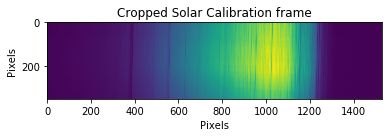

In [42]:
#Now we use array indexing to examine a chosen part of the spectrum to see if it contains the data we need (i.e., spectral lines).
plt.imshow(avg_sun[100:450,:])
plt.title('Cropped Solar Calibration frame')
plt.xlabel('Pixels')
plt.ylabel('Pixels')

In [43]:
plt.imshow(avg_lamp_helium[100:450,:])
plt.title('Cropped He Calibration frame')
plt.xlabel('Pixels')
plt.ylabel('Pixels')


Text(0, 0.5, 'Pixels')

In [44]:
plt.imshow(avg_lamp_neon[100:450,:])
plt.title('Cropped Ne Calibration frame')
plt.xlabel('Pixels')
plt.ylabel('Pixels')

Text(0, 0.5, 'Pixels')

Our next step is to take the calibrated frames and plot them while correcting for the stretch and shift. This is esentially calibrating the CCD.

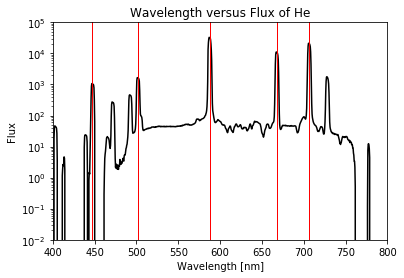

In [70]:
lamp_good_helium = np.asarray(avg_lamp_helium[100:450,:]).mean(axis=0) #Averages the value along each column in the region that our spectra look relatively free of contamination
sun_good  = np.asarray(avg_sun[100:450,:]).mean(axis=0)

example_lines = [4471.48/10.0,5875.62/10.0,7065.19/10.0,6678.15/10.0, 5015.68/10.0] #These are actual wavelengths for the lamp, at given high intensity wavelengths of the element He
stretch = 0.43
shift = -270

plt.semilogy(np.flip(np.arange(len(lamp_good_helium))*stretch-shift,0), lamp_good_helium, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines:
    plt.axvline(line,color='r', linewidth = 1)
plt.xlim(400,800)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.ylim(10**(-2),10**5)
plt.title('Wavelength versus Flux of He')
plt.show()

# The x-axis wavelength values are clearly incorrect. They need to be stretched and shifted so that the lines
# from the discharge tube match with their actual values. This correction can then also be applied to our solar spectra
#This is being matched up with neon high intensity lines in AA so divide by 10 for nm

We do the same this as above for the Ne spectrum

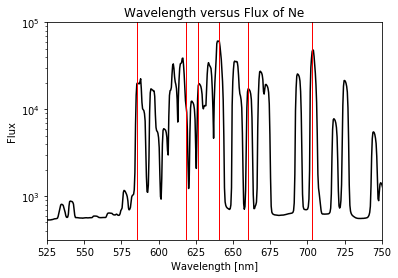

In [67]:
lamp_good_neon = np.asarray(avg_lamp_neon[100:450,:]).mean(axis=0)
sun_good  = np.asarray(avg_sun[100:450,:]).mean(axis=0)

example_lines = [5852.49/10.0, 6182.15/10.0,6402.25/10.0,6266.50/10.0,6598.95/10.0,7032.41/10.0] #These are actual wavelengths for the lamp, at given high intensity wavelengths of the element Ne
stretch2 = 0.43
shift2 = -271

plt.semilogy(np.flip(np.arange(len(lamp_good_neon))*stretch2-shift2,0), lamp_good_neon, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines:
    plt.axvline(line,color='r', linewidth = 1)
plt.xlim(525,750)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.ylim(10**2.5,10**5)
plt.title('Wavelength versus Flux of Ne')
plt.show()

Finally, we wish to compare our results to the spectrum of the sun we took by marking known Fraunhofer lines and using the CCD stretch and shrink factor we derived whilst plotting the solar spectrum. We see a great range of agreement between the observed spectrum and the known Fraunhofer lines.

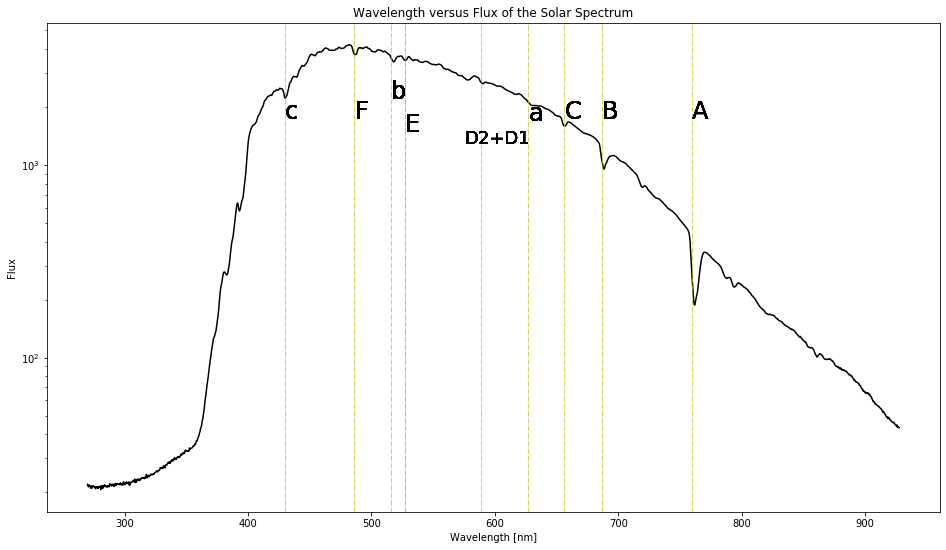

In [29]:
plt.figure(figsize = (16,9))
plt.semilogy(np.flip(np.arange(len(sun_good)),0)*stretch-shift, sun_good, 'k-')
vertcols2 = [686.719,759.370,656.281,627,527.039,430,486,516,527,589]
for col in vertcols2:
    plt.axvline(col, color = 'y', linestyle = '-.', linewidth = 0.7)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Flux')
    plt.title('Wavelength versus Flux of the Solar Spectrum')
    plt.annotate('b', xy = (516,2200), fontsize = 24)
    plt.annotate('E', xy = (527,1500), fontsize = 24)           
    plt.annotate('c', xy = (430,1750), fontsize = 24)
    plt.annotate('F', xy = (486,1750), fontsize = 24)
    plt.annotate('B', xy = (686.719,1750), fontsize = 24)
    plt.annotate('A', xy = (759.370,1750), fontsize = 24)
    plt.annotate('C', xy = (656.281,1750), fontsize = 24)
    plt.annotate('a', xy = (627,1700), fontsize = 24)
    plt.annotate('D2+D1', xy = (575,1300), fontsize = 18)
plt.show()